In [1]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000




In [2]:
submission = pd.read_csv("sample_submission.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.shape , test.shape

((1460, 81), (1459, 80))

In [4]:
train.head(5).sort_values('SalePrice', ascending = False)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [5]:
def skew_func(train):

    sns.set_style("white")
    sns.set_color_codes(palette='deep')
    f, ax = plt.subplots(figsize=(8, 7))
    #Check the new distribution 
    sns.distplot(train['SalePrice'], color="b", fit=norm);

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(train['SalePrice'])
    sigma2 = np.std(train['SalePrice'])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    ax.xaxis.grid(False)
    ax.set(ylabel="Frequency")
    ax.set(xlabel="SalePrice")
    ax.set(title="SalePrice distribution")
    sns.despine(trim=True, left=True)

    plt.show()


 mu = 180921.20 and sigma = 79415.29



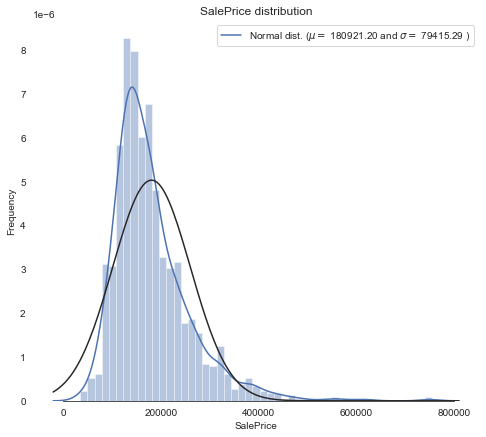

In [6]:
skew_func(train)

In [7]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


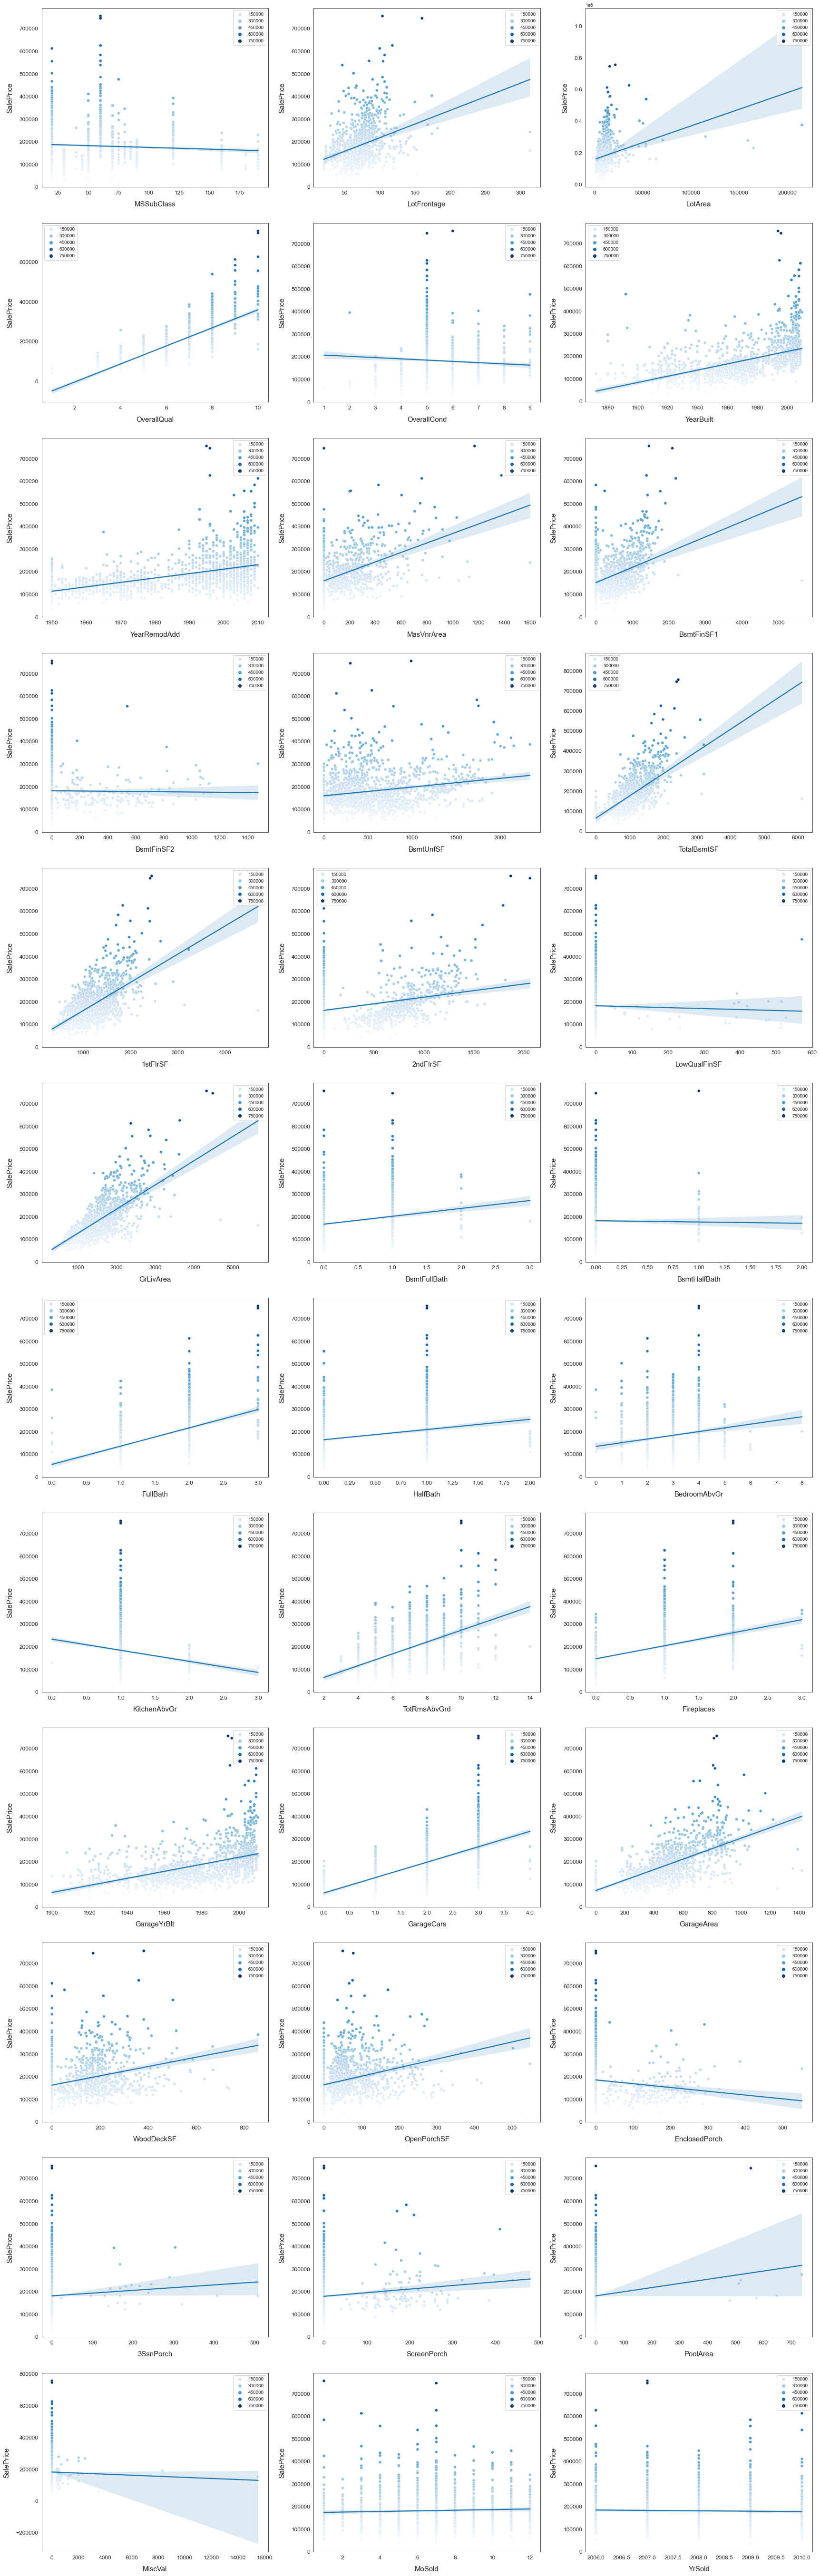

In [8]:
# Finding numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in train.columns:
    if train[i].dtype in numeric_dtypes:
        if i in ['Id', 'SalePrice']:
            pass
        else:
            numeric.append(i)     
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(train[numeric]), 1):
   # if(feature=='MiscVal'):
   #    break
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Blues', data=train)
    sns.regplot(x=feature, y='SalePrice', scatter=False, data=train)
    
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

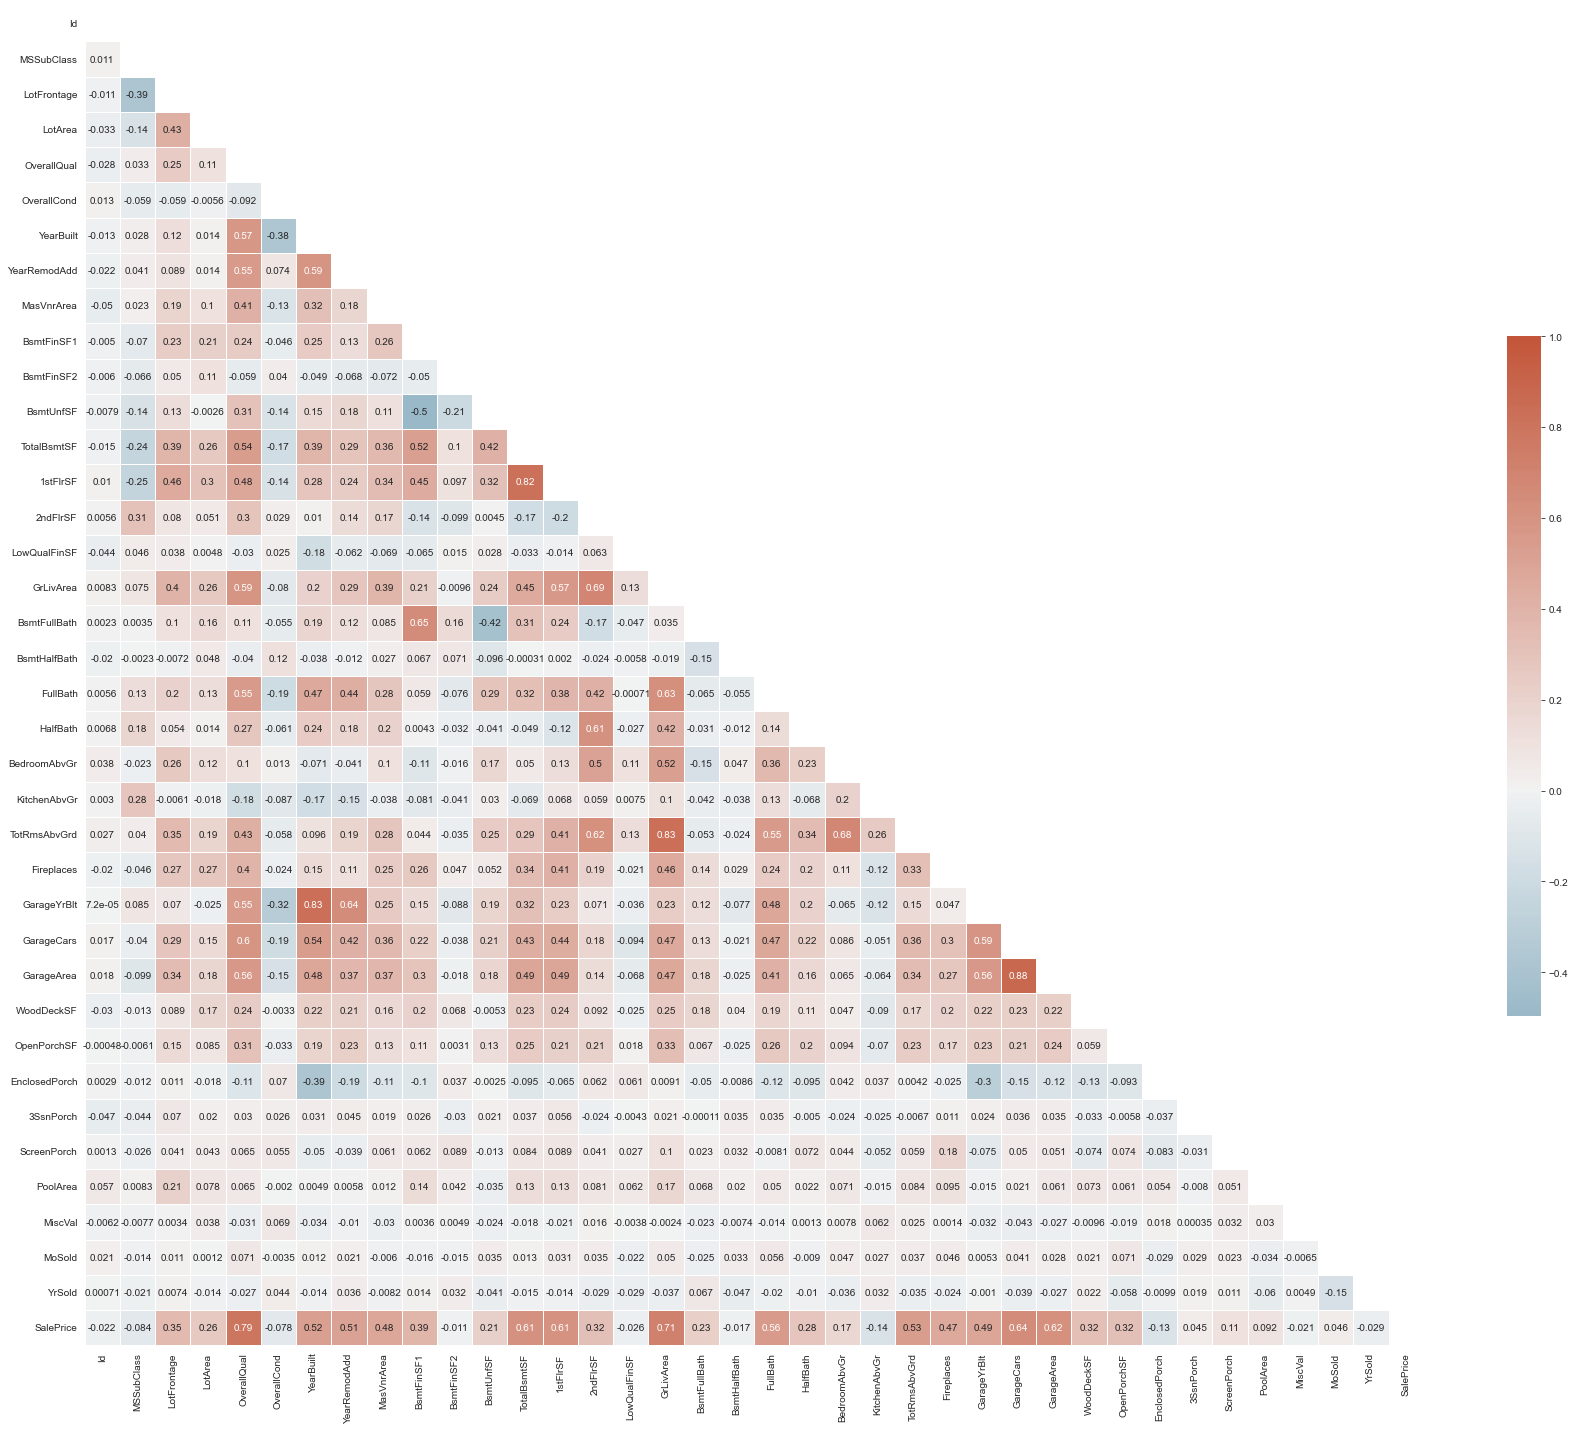

In [9]:
# Correlation Matrix

f, ax = plt.subplots(figsize=(30, 25))
mat = train.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [10]:
#cor_matrix.dropna(inplace=True)
list_x=list()
list_y=list()
list_cor=list()
for x in mat.columns:
    for y in mat.columns:
        if abs(mat[x][y])>0.7 and x<y:
           list_x.append(x)
           list_y.append(y)
           list_cor.append(mat[x][y])
cor=pd.DataFrame()
cor['x']=list_x
cor['y']=list_y
cor['cor_value']=list_cor


In [11]:
from scipy import stats
_p=list()
for i in range(len(cor)):
    _p.append(stats.spearmanr(train[cor['x'][i]], train[cor['y'][i]],nan_policy='omit')[1])
cor['p_value']= _p

In [12]:
cor

,x,y,cor_value,p_value
0,OverallQual,SalePrice,0.790982,0.000000e+00
1,1stFlrSF,TotalBsmtSF,0.819530,0.000000e+00
2,GrLivArea,TotRmsAbvGrd,0.825489,0.000000e+00
3,GrLivArea,SalePrice,0.708624,1.431015e-244
4,GarageYrBlt,YearBuilt,0.825667,0.000000e+00
5,GarageArea,GarageCars,0.882475,0.000000e+00


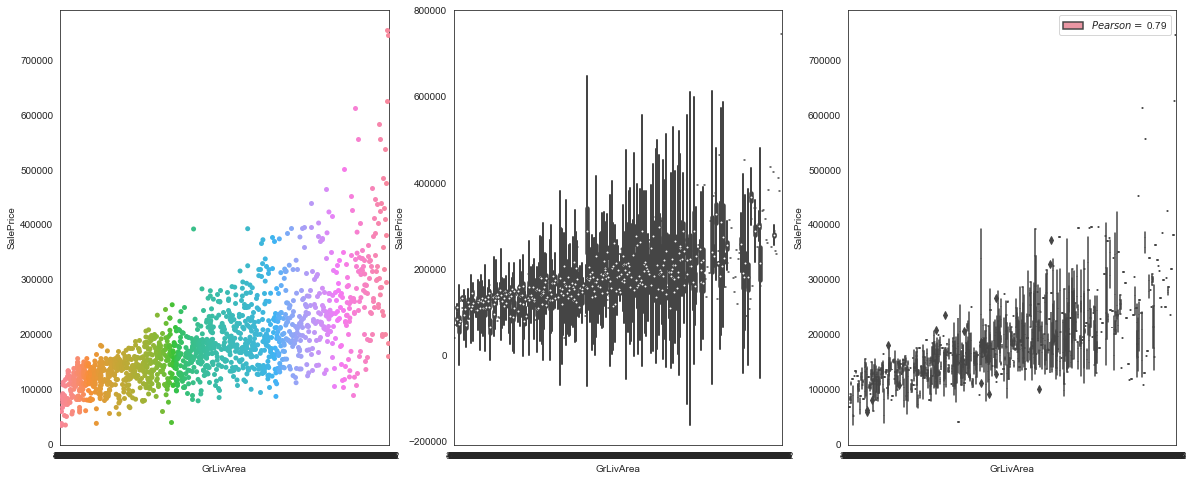

In [13]:
# GrLivArea - looks highly co-related Peasrson- 0.7
Pearson_GrLiv = 0.79
figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data=train, x = 'GrLivArea', y='SalePrice', ax = ax[0])
sns.violinplot(data=train, x = 'GrLivArea', y='SalePrice', ax = ax[1])
sns.boxplot(data=train, x = 'GrLivArea', y='SalePrice', ax = ax[2])
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GrLiv)], loc = 'best')
plt.show()

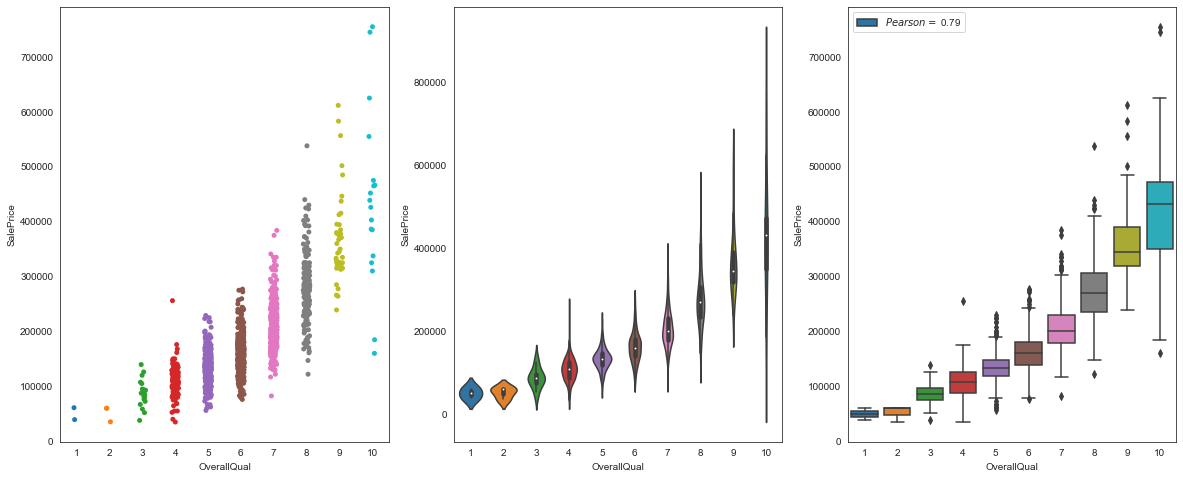

In [14]:
# OverallQuall - looks highly co-related Peasrson- 0.79
Pearson_GrLiv = 0.79
figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data=train, x = 'OverallQual', y='SalePrice', ax = ax[0])
sns.violinplot(data=train, x = 'OverallQual', y='SalePrice', ax = ax[1])
sns.boxplot(data=train, x = 'OverallQual', y='SalePrice', ax = ax[2])
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GrLiv)], loc = 'best')
plt.show()

<AxesSubplot:>

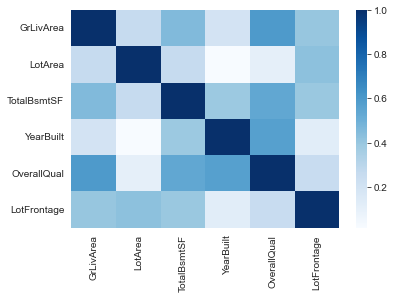

In [15]:
cols = ['GrLivArea','LotArea','TotalBsmtSF','YearBuilt','OverallQual', 'LotFrontage']
df = train[cols]
corr = df.corr()
sns.heatmap(corr, cmap='Blues')

In [16]:
# Remove the Ids from train and test, as they are unique for each row and hence not useful for the model
train_ID = train['Id']
test_ID = test['Id']
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
train.shape, test.shape

((1460, 80), (1459, 79))

In [17]:
#Removing Sales Price skewness
train['SalePrice']= np.log1p(train['SalePrice'])
train.shape, test.shape

((1460, 80), (1459, 79))


 mu = 12.02 and sigma = 0.40



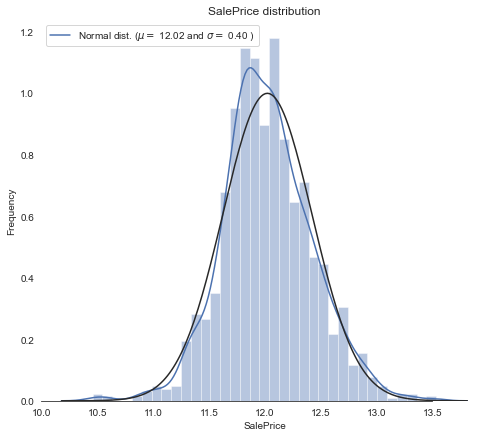

In [18]:
skew_func(train)

In [19]:
# Skew and kurt
print("New Skewness: %f" % train['SalePrice'].skew())
print("New Kurtosis: %f" % train['SalePrice'].kurt())

New Skewness: 0.121347
New Kurtosis: 0.809519


In [20]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_train = train.select_dtypes(include=numerics)
num_test =test.select_dtypes(include=numerics)
num_train.drop("SalePrice",inplace = True,axis =1 )

In [22]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
knn = imputer.fit(num_train)
num_train=pd.DataFrame(knn.transform(num_train),columns=num_train.columns)
num_test = pd.DataFrame(knn.transform(num_test),columns=num_test.columns)


In [23]:
for col in num_train.columns:
    train[col] = num_train[col]
    test[col] = num_test[col]

In [24]:
# Split features and labels and record our label indices
train_labels = train['SalePrice'].reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

# Combine train and test features in order to apply the feature transformation pipeline to the entire dataset
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
all_features.shape

(2919, 79)

In [25]:
#custom function to help us look at missing data
def missing (train, n=5):
    missing_number = train.isnull().sum().sort_values(ascending=False)
    missing_percent = ((train.isnull().sum()/train.isnull().count())*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number,missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent']).reset_index()
    return missing_values[missing_values['Missing_Number']>0][:n]

missing(all_features,5)

,index,Missing_Number,Missing_Percent
0,PoolQC,2909,99.657417
1,MiscFeature,2814,96.402878
2,Alley,2721,93.216855
3,Fence,2348,80.438506
4,FireplaceQu,1420,48.646797


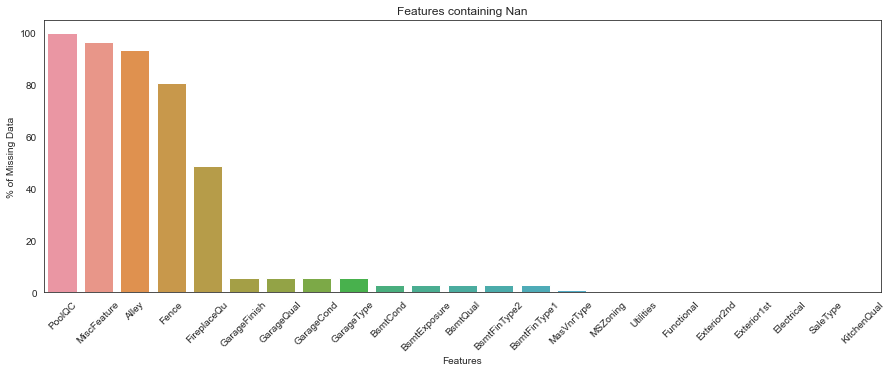

In [26]:
# Plotting Nans for a quick Visual
plt.figure(figsize = (15,5))
x = missing(all_features, 100)['index']
y = missing(all_features,100)['Missing_Percent']
sns.barplot(x = x, y = y)
plt.xticks(rotation=45)
plt.title('Features containing Nan')
plt.xlabel('Features')
plt.ylabel('% of Missing Data')
plt.show()

In [27]:
#adding new features
all_features["SqFtPerRoom"] = all_features["GrLivArea"] / (all_features["TotRmsAbvGrd"] +
                                                       all_features["FullBath"] +
                                                       all_features["HalfBath"] +
                                                       all_features["KitchenAbvGr"])
all_features['Total_Home_Quality'] = all_features['OverallQual'] + all_features['OverallCond']
all_features['Total_Bathrooms'] = (all_features['FullBath'] + (0.5 * all_features['HalfBath']) +
                               all_features['BsmtFullBath'] + (0.5 * all_features['BsmtHalfBath']))
all_features["HighQualSF"] = all_features["1stFlrSF"] + all_features["2ndFlrSF"]

In [28]:
# More helpful categorical features
def catFeat(all_features):
    all_features['BsmtFinType1_Unf'] = 1*(all_features['BsmtFinType1'] == 'Unf')
    all_features['HasWoodDeck'] = (all_features['WoodDeckSF'] > 0) * 1
    all_features['HasOpenPorch'] = (all_features['OpenPorchSF'] > 0) * 1
    all_features['HasEnclosedPorch'] = (all_features['EnclosedPorch'] > 0) * 1
    all_features['Has3SsnPorch'] = (all_features['3SsnPorch'] > 0) * 1
    all_features['HasScreenPorch'] = (all_features['ScreenPorch'] > 0) * 1
    all_features['YearsSinceRemodel'] = all_features['YrSold'].astype(int) - all_features['YearRemodAdd'].astype(int)
    all_features['Haspool'] = all_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    all_features['Has2ndfloor'] = all_features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    all_features['Hasgarage'] = all_features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    all_features['Hasbsmt'] = all_features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    all_features['Hasfireplace'] = all_features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    return all_features

all_features = catFeat(all_features)

# Fetch all numeric features
numeric_features = all_features.dtypes[all_features.dtypes != object].index
skewed_features = all_features[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index
# Normalize skewed features using log_transformation
all_feature_nskew = all_features.copy()

for i in skew_index:
    all_feature_nskew[i] = np.log1p(all_feature_nskew[i])

all_features.shape

(2919, 95)

In [29]:
# Creating dummy variables from categorical features
all_features_dummy = pd.get_dummies(all_feature_nskew)

In [30]:
all_features_dummy.shape

(2919, 304)

In [31]:
# first lets remove any duplicate cols
all_features_dummy = all_features_dummy.loc[:,~all_features_dummy.columns.duplicated()].copy()

In [32]:
for col in all_features_dummy.columns:
    if all_features_dummy[col].isna().sum()!= 0:
        print(col,all_features_dummy[col].isna().sum())

In [33]:
X = all_features_dummy.iloc[:len(train_labels), :]
X_test = all_features_dummy.iloc[len(train_labels):, :]
X.shape, train_labels.shape, X_test.shape

((1460, 303), (1460,), (1459, 303))

In [34]:
X.to_csv('processed_X.csv',index=False)
train_labels.to_csv('processed_y.csv', index=False)

In [35]:
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [36]:
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, train_labels, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,LinearRegression,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVR
from math import sqrt
from sklearn.metrics import mean_squared_error
def models_seletion(x_train,y_train):
    models = {
    "Lasso": Lasso(),
    "RF": RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42),
    "GBM": GradientBoostingRegressor(n_estimators=5211, 
                                learning_rate=0.009636280613755809, 
                                max_depth=4, 
                                max_features='sqrt', 
                                min_samples_leaf=5, 
                                min_samples_split=9, 
                                loss='huber', 
                                random_state=1),
    "SVM": LinearSVR(), 
    "LR":LinearRegression(),
    "DTR":DecisionTreeRegressor(),
    "AB":AdaBoostRegressor(),
    "Ridge":Ridge(),
    "ENet":ElasticNet(max_iter=100000, 
                                                      alpha=0.0007, 
                                                      l1_ratio=0.9, 
                                                      random_state=1),
    "XGB":XGBRegressor(max_depth=5,           
                  learning_rate=0.013272941370633515,    
                  n_estimators=1876,     
                  min_child_weight=1,    
                  colsample_bytree=0.2395378257765287,  
                  subsample= 0.7496307600223272,         
                  reg_alpha=0.02152634109282501,         
                  reg_lambda=0.06544801615179391,
                  random_state=1),
    "LGBM":LGBMRegressor(objective='regression',
                         boosting_type='gbdt',
                       learning_rate=0.03,
                         num_leaves =106,
                       n_estimators=6000,
                         max_depth = 4,
                         min_child_samples = 1,
                         min_split_gain=0, 
                       subsample=0.4,
                       subsample_freq=3, 
                       colsample_bytree=0.6,
                         reg_alpha=0.008,
                         reg_lambda=0.03,
                       verbose=-1,
                       random_state=42),
    "CatB":CatBoostRegressor(task_type= 'GPU', 
                            verbose = False)
    }
    df_score=pd.DataFrame(columns=['model_name','RMSE_mean_score','RMSE_std_score'])
    list_name=[]
    scores_mean =[]
    scores_std = []
    for name,model in models.items():
        regr=model
        regr.fit(x_train,y_train)
        train_pred =regr.predict(x_train)
        score=cross_val_score(regr,x_train,y_train,cv=5,scoring="neg_root_mean_squared_error")

        list_name.append(name)
        scores_mean.append(round(abs(score.mean()),5))
        scores_std.append(round(abs(score.std()),5))

        list_name.append(name)
        scores_mean.append(round(abs(score.mean()),5))
        scores_std.append(round(abs(score.std()),5))

        print(list_name)
        print(scores_mean)
        print(scores_std)
    df_score['model_name']=list_name
    df_score['RMSE_mean_score']=scores_mean
    df_score['RMSE_std_score']=scores_std
    return df_score.sort_values('RMSE_mean_score')

In [38]:
df_score= models_seletion(X,train_labels)

['Lasso', 'Lasso']
[0.26802, 0.26802]
[0.0107, 0.0107]
['Lasso', 'Lasso', 'RF', 'RF']
[0.26802, 0.26802, 0.14456, 0.14456]
[0.0107, 0.0107, 0.01129, 0.01129]
['Lasso', 'Lasso', 'RF', 'RF', 'GBM', 'GBM']
[0.26802, 0.26802, 0.14456, 0.14456, 0.11787, 0.11787]
[0.0107, 0.0107, 0.01129, 0.01129, 0.01318, 0.01318]
['Lasso', 'Lasso', 'RF', 'RF', 'GBM', 'GBM', 'SVM', 'SVM']
[0.26802, 0.26802, 0.14456, 0.14456, 0.11787, 0.11787, 0.28461, 0.28461]
[0.0107, 0.0107, 0.01129, 0.01129, 0.01318, 0.01318, 0.04347, 0.04347]
['Lasso', 'Lasso', 'RF', 'RF', 'GBM', 'GBM', 'SVM', 'SVM', 'LR', 'LR']
[0.26802, 0.26802, 0.14456, 0.14456, 0.11787, 0.11787, 0.28461, 0.28461, 0.14779, 0.14779]
[0.0107, 0.0107, 0.01129, 0.01129, 0.01318, 0.01318, 0.04347, 0.04347, 0.02612, 0.02612]
['Lasso', 'Lasso', 'RF', 'RF', 'GBM', 'GBM', 'SVM', 'SVM', 'LR', 'LR', 'DTR', 'DTR']
[0.26802, 0.26802, 0.14456, 0.14456, 0.11787, 0.11787, 0.28461, 0.28461, 0.14779, 0.14779, 0.2061, 0.2061]
[0.0107, 0.0107, 0.01129, 0.01129, 0.01318,

In [39]:
df_score

,model_name,RMSE_mean_score,RMSE_std_score
4,GBM,0.11787,0.01318
5,GBM,0.11787,0.01318
18,XGB,0.11919,0.01272
19,XGB,0.11919,0.01272
21,LGBM,0.12086,0.01079
20,LGBM,0.12086,0.01079
17,ENet,0.12226,0.01578
16,ENet,0.12226,0.01578
22,CatB,0.12692,0.01066
23,CatB,0.12692,0.01066


In [188]:
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

In [190]:
ridgecv = make_pipeline(RobustScaler(), RidgeCV(alphas=[1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100], cv=kf))

In [191]:
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

In [192]:
elasticnet = make_pipeline(RobustScaler(), ElasticNet(max_iter=500, 
                                                      alpha=0.0007, 
                                                      l1_ratio=0.9, 
                                                      random_state=1))

In [195]:
lightgbm = LGBMRegressor(objective='regression',
                         boosting_type='gbdt',
                       learning_rate=0.03,
                         num_leaves =106,
                       n_estimators=500,
                         max_depth = 4,
                         min_child_samples = 1,
                         min_split_gain=0, 
                       subsample=0.4,
                       subsample_freq=3, 
                       colsample_bytree=0.6,
                         reg_alpha=0.008,
                         reg_lambda=0.03,
                       verbose=-1
                  )

# XGBoost Regressor
xgboost = XGBRegressor(max_depth=5,           
                  learning_rate=0.013272941370633515,    
                  n_estimators=1876,     
                  min_child_weight=1,    
                  colsample_bytree=0.2395378257765287,  
                  subsample= 0.7496307600223272,         
                  reg_alpha=0.02152634109282501,         
                  reg_lambda=0.06544801615179391,
                  random_state=1
                      )

# Ridge Regressor

ridge = make_pipeline(RobustScaler(), Ridge(alpha=6,random_state=1))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=5211, 
                                learning_rate=0.009636280613755809, 
                                max_depth=4, 
                                max_features='sqrt', 
                                min_samples_leaf=5, 
                                min_samples_split=9, 
                                loss='huber', 
                                random_state=1)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=500,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True)

# Cat Bosst Regressor
catb = CatBoostRegressor(task_type= 'GPU', 
                            verbose = False)

In [197]:
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf, catb,elasticnet),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [198]:
print('elasticnet')
enet_model_full_data = elasticnet.fit(X, train_labels)
print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(train_labels))
print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, train_labels)
print('xgboost')
xgb_model_full_data = xgboost.fit(X, train_labels)
print('Svr')
svr_model_full_data = svr.fit(X, train_labels)
print('Ridge')
ridge_model_full_data = ridgecv.fit(X, train_labels)
print('RandomForest')
rf_model_full_data = rf.fit(X, train_labels)
print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, train_labels)
print('CatBoosting')
cat_model_full_data = catb.fit(X, train_labels)

elasticnet
stack_gen
lightgbm
xgboost
Svr
Ridge
RandomForest
GradientBoosting
CatBoosting


In [199]:
def blended_predictions(X):
    return ((0.05 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * cat_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.05 * rf_model_full_data.predict(X)) + \
            (0.05*enet_model_full_data.predict(X))+\
            (0.35 * stack_gen_model.predict(np.array(X))))

In [200]:
df_score

,model_name,RMSE_mean_score,RMSE_std_score
4,GBM,0.11787,0.01318
5,GBM,0.11787,0.01318
18,XGB,0.11919,0.01272
19,XGB,0.11919,0.01272
21,LGBM,0.12086,0.01079
20,LGBM,0.12086,0.01079
17,ENet,0.12226,0.01578
16,ENet,0.12226,0.01578
22,CatB,0.12692,0.01066
23,CatB,0.12692,0.01066


In [201]:
# Get final precitions from the blended model
blended_score = rmsle(train_labels, blended_predictions(X))
df_score.append(["blended",blended_score, 0])
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.6047797914549388


In [202]:
models=[]
models.append(ridge_model_full_data)
models.append(svr_model_full_data)
models.append(cat_model_full_data)
models.append(gbr_model_full_data)
models.append(xgb_model_full_data)
models.append(lgb_model_full_data)
models.append(rf_model_full_data)
models.append(stack_gen_model)
models.append(enet_model_full_data)

In [203]:
## Optimization

from scipy.optimize import minimize

predictions = []
for model in models:
    if model in ['stack_gen_model']:
        predictions.append(model.predict(np.array(X)))
    else:
        predictions.append(model.predict(X))
    

def mse_func(weights):
    #scipy minimize will pass the weights as a numpy array
    final_prediction = 0
    for weight, prediction in zip(weights, predictions):
            final_prediction += weight*prediction
    #return np.mean((y_test-final_prediction)**2)
    return np.sqrt(mean_squared_error(train_labels, final_prediction))
    
starting_values = [0]*len(predictions)

cons = ({'type':'ineq','fun':lambda w: 1-sum(w)})
#our weights are bound between 0 and 1
bounds = [(0.05,1)]*len(predictions)

res = minimize(mse_func, starting_values, method='SLSQP', bounds=bounds, constraints=cons)

print('Ensamble Score: {best_score}'.format(best_score=res['fun']))
print('Best Weights: {weights}'.format(weights=res['x']))

mlist = ['ridge', 'svr', 'cat', 'gbr' , 'xgb', 'lgb', 'rf', 'stack_gen',"elnet"]
blend_wts = pd.DataFrame({'model': mlist, 'optimised_wts': list(res['x'])}, columns=['model', 'optimised_wts'])

Ensamble Score: 0.04719357346248156
Best Weights: [0.05       0.05       0.05       0.0766395  0.05       0.20513386
 0.05       0.41815953 0.05      ]


In [204]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(X):
      return ((0.05 * ridge_model_full_data.predict(X)) + \
            (0.05 * svr_model_full_data.predict(X)) + \
            (0.05 * cat_model_full_data.predict(X)) + \
            (0.0766395 * gbr_model_full_data.predict(X)) + \
            (0.05 * xgb_model_full_data.predict(X)) + \
            (0.20513386 * lgb_model_full_data.predict(X)) + \
            (0.05 * rf_model_full_data.predict(X)) + \
            (0.41815953*enet_model_full_data.predict(X))+\
            (0.05 * stack_gen_model.predict(np.array(X))))

In [205]:
df_score.keys()

Index(['model_name', 'RMSE_mean_score', 'RMSE_std_score'], dtype='object')

In [212]:
# # Plot the predictions for each model
# sns.set_style("white")
# fig = plt.figure(figsize=(18, 12))

# ax = sns.pointplot(x=list(df_score.keys()), y=[score for score, _ in df_score.items()], markers=['o'], linestyles=['-'])
# for i, score in enumerate(df_score.values()):
#     ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

# plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
# plt.xlabel('Model', size=20, labelpad=12.5)
# plt.tick_params(axis='x', labelsize=13.5)
# plt.tick_params(axis='y', labelsize=12.5)

# plt.title('Scores of Models', size=20)

# plt.show()

In [207]:
# Read in sample_submission dataframe
submission = pd.read_csv("sample_submission.csv")
submission.shape

(1459, 2)

In [208]:
# reg = GradientBoostingRegressor(n_estimators=6000,
#                                 learning_rate=0.01,
#                                 max_depth=4,
#                                 max_features='sqrt',
#                                 min_samples_leaf=15,
#                                 min_samples_split=10,
#                                 loss='huber',
#                                 random_state=42) 
# reg.fit(X,train_labels)

In [209]:
# Append predictions from blended models
submission.iloc[:,1] = np.floor(np.expm1(blended_predictions(X_test)))
submission.to_csv("submission_regression1.csv", index=False)

In [210]:
submission.head()


,Id,SalePrice
0,1461,120548.0
1,1462,154796.0
2,1463,182675.0
3,1464,193121.0
4,1465,192206.0
